In [1]:
# CASE STUDY A NEW COMPANY WANT TO START A LAPTOP BUSINESS IN INDIA 
# DO THE MARKET ANALYSIS OF THE EXISTING BRANDS

In [2]:
# DEEP FEATURE ENGINEERING Techno commercial ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
seed = 42

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("laptops.csv", encoding='ISO-8859-1')
df.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight  Price(INR)  
0                      NaN  1.37kg      124176  
1                      NaN  1.34kg       83323  
2                      NaN  1.86kg       53297  
3                      NaN  1.83kg      235196  
4                      NaN  1.37kg      167176

In [7]:
df_train, df_test = train_test_split(df, test_size = 0.25)
print(df_train.shape, df_test.shape)

(977, 13) (326, 13)


In [8]:
df_train.head()

Manufacturer                            Model Name   Category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     Screen Size                       Screen                         CPU  \
1295       15.6"                     1366x768  Intel Core i7 7500U 2.7GHz   
954        14.0"  IPS Panel Full HD 1920x1080  Intel Core i7 6600U 2.6GHz   
1108       15.6"            Full HD 1920x1080   AMD A6-Series 9220 2.5GHz   
463        14.0"  IPS Panel Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   
717        15.6"                     1366x768     AMD A6-Series 7310 2GHz   

      RAM    Storage                    GPU Operating System  \
1295  8GB    1TB HDD     AMD Radeon R5 M430            Linux   
954   8GB  256GB SSD  Intel HD Graphics 520          Windows   
1108  4GB    1TB HDD          AMD Radeon R4          Windows   
463   8GB  512GB SSD     AMD Radeon R7 M460            No OS   
717   4GB  500GB HDD          AMD Radeon R4          Windows   

     Operating System Version  Weight  Price(INR)  
1295                      NaN   2.3kg       74707  
954                        10   1.7kg      138014  
1108                       10   2.1kg       36891  
463                       NaN   1.5kg       74059  
717                        10  2.19kg       27622

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 1295 to 763
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              977 non-null    object
 1   Model Name                977 non-null    object
 2   Category                  977 non-null    object
 3   Screen Size               977 non-null    object
 4   Screen                    977 non-null    object
 5   CPU                       977 non-null    object
 6   RAM                       977 non-null    object
 7    Storage                  977 non-null    object
 8   GPU                       977 non-null    object
 9   Operating System          977 non-null    object
 10  Operating System Version  848 non-null    object
 11  Weight                    977 non-null    object
 12  Price(INR)                977 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 106.9+ KB


- There's just one numerical columns: 'Price'
- It could be good idea to change other columns into numerical, such as CPU, RAM, Memory and Weight

In [10]:
df_train.describe()

Price(INR)
count     977.000000
mean   103733.513818
std     64079.897620
min     16128.000000
25%     55521.000000
50%     88890.000000
75%    138368.000000
max    565316.000000

# Data Cleaning
- Before exploring the data with EDA, we will perform some data cleaning.
- First, we will change the columns into lower case.

In [11]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [12]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price(inr)'],
      dtype='object')

In [13]:
df_train.shape

(977, 13)

## Check for duplicates

In [17]:
len(df_train[df_train.duplicated()])

18

In [18]:
df_train = df_train.drop_duplicates()

In [19]:
len(df_train[df_train.duplicated()])

0

In [20]:
print(df_train.shape)

(959, 13)


In [21]:
# Next, we will analyze each column and get some insights
# Dataset Cleaning + Feature Engineering

### Screen resolution

In [24]:
df_train['screen']

1295                        1366x768
954      IPS Panel Full HD 1920x1080
1108               Full HD 1920x1080
463      IPS Panel Full HD 1920x1080
717                         1366x768
                    ...             
729                Full HD 1920x1080
1130                        1366x768
597      IPS Panel Full HD 1920x1080
615                Full HD 1920x1080
763     IPS Panel Quad HD+ 3200x1800
Name: screen, Length: 959, dtype: object

- In the screen resolution column, there are included multiple useful informations. -Screen type -Resolution -Touchscreen
- We will separate this 3 informations in 3 different columns.

## Feature Engineering on Screen resolution

In [25]:
df_train['resolution'] = df_train['screen'].str.extract(r'(\d+x\d+)')
df_test['resolution'] = df_test['screen'].str.extract(r'(\d+x\d+)')

In [26]:
df_train['screen_type'] = df_train['screen'].replace(r'(\d+x\d+)','', regex = True)
df_test['screen_type'] = df_test['screen'].replace(r'(\d+x\d+)','', regex = True)

In [27]:
df_train['screen_type'] = df_train['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)

In [28]:
df_train['screen_type']

1295               
954     IPS Panel  
1108               
463     IPS Panel  
717                
           ...     
729                
1130               
597     IPS Panel  
615                
763     IPS Panel  
Name: screen_type, Length: 959, dtype: object

## Now we can extract the information about the presence of a touchscreen or not

In [29]:
df_train['touchscreen'] = df_train['screen_type'].str.extract(r'(Touchscreen)')
df_train['screen_type'] = df_train['screen_type'].replace(r'(Touchscreen)','', regex = True)

df_test['touchscreen'] = df_test['screen_type'].str.extract(r'(Touchscreen)')
df_test['screen_type'] = df_test['screen_type'].replace(r'(Touchscreen)','', regex = True)

In [30]:
df_train['touchscreen'].value_counts()

touchscreen
Touchscreen    150
Name: count, dtype: int64

In [31]:
df_train['touchscreen'] = df_train['touchscreen'].replace('Touchscreen', 1)
df_train['touchscreen'] = df_train['touchscreen'].replace(np.nan, 0)

df_test['touchscreen'] = df_test['touchscreen'].replace('Touchscreen', 1)
df_test['touchscreen'] = df_test['touchscreen'].replace(np.nan, 0)

In [32]:
df_train['touchscreen'].value_counts()

touchscreen
0.0    809
1.0    150
Name: count, dtype: int64

In [33]:
df_train['screen_type'].value_counts()

screen_type
                             417
                             208
IPS Panel                    200
                              61
IPS Panel                     53
IPS Panel Retina Display      11
IPS Panel                      9
Name: count, dtype: int64

In [34]:
df_train['screen_type'] = df_train['screen_type'].replace(r' ','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r' ','', regex = True)
df_train['screen_type'].value_counts()

screen_type
                         686
IPSPanel                 262
IPSPanelRetinaDisplay     11
Name: count, dtype: int64

## Now we just need to subsitute the blank spaces with a 'NaN'

In [35]:
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_train['screen_type'].value_counts()

screen_type
IPSPanel                 262
IPSPanelRetinaDisplay     11
Name: count, dtype: int64

In [36]:
df_train.head()

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     screen size                       screen                         cpu  \
1295       15.6"                     1366x768  Intel Core i7 7500U 2.7GHz   
954        14.0"  IPS Panel Full HD 1920x1080  Intel Core i7 6600U 2.6GHz   
1108       15.6"            Full HD 1920x1080   AMD A6-Series 9220 2.5GHz   
463        14.0"  IPS Panel Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   
717        15.6"                     1366x768     AMD A6-Series 7310 2GHz   

      ram    storage                    gpu operating system  \
1295  8GB    1TB HDD     AMD Radeon R5 M430            Linux   
954   8GB  256GB SSD  Intel HD Graphics 520          Windows   
1108  4GB    1TB HDD          AMD Radeon R4          Windows   
463   8GB  512GB SSD     AMD Radeon R7 M460            No OS   
717   4GB  500GB HDD          AMD Radeon R4          Windows   

     operating system version  weight  price(inr) resolution screen_type  \
1295                      NaN   2.3kg       74707   1366x768         NaN   
954                        10   1.7kg      138014  1920x1080    IPSPanel   
1108                       10   2.1kg       36891  1920x1080         NaN   
463                       NaN   1.5kg       74059  1920x1080    IPSPanel   
717                        10  2.19kg       27622   1366x768         NaN   

      touchscreen  
1295          0.0  
954           0.0  
1108          0.0  
463           0.0  
717           0.0

## We can so drop the original 'screen' column!

In [37]:
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis = 1)

In [38]:
df_train.head(2)

manufacturer     model name   category screen size  \
1295         Dell  Inspiron 3567   Notebook       15.6"   
954        Lenovo  Thinkpad T460  Ultrabook       14.0"   

                             cpu  ram    storage                    gpu  \
1295  Intel Core i7 7500U 2.7GHz  8GB    1TB HDD     AMD Radeon R5 M430   
954   Intel Core i7 6600U 2.6GHz  8GB  256GB SSD  Intel HD Graphics 520   

     operating system operating system version weight  price(inr) resolution  \
1295            Linux                      NaN  2.3kg       74707   1366x768   
954           Windows                       10  1.7kg      138014  1920x1080   

     screen_type  touchscreen  
1295         NaN          0.0  
954     IPSPanel          0.0

In [39]:
# The newly created columns are as follows:

In [40]:
df_train['resolution'].value_counts()

resolution
1920x1080    641
1366x768     208
3840x2160     29
3200x1800     21
2560x1440     19
1600x900      14
2256x1504      5
2880x1800      4
2560x1600      4
2400x1600      4
1920x1200      3
1440x900       2
2160x1440      2
2304x1440      2
2736x1824      1
Name: count, dtype: int64

In [41]:
df_train['screen_type'].value_counts()

screen_type
IPSPanel                 262
IPSPanelRetinaDisplay     11
Name: count, dtype: int64

In [42]:
df_train['touchscreen'].value_counts()

touchscreen
0.0    809
1.0    150
Name: count, dtype: int64

## Now we will perform the same feature engineering process to CPU column

In [44]:
df_train['cpu']

1295     Intel Core i7 7500U 2.7GHz
954      Intel Core i7 6600U 2.6GHz
1108      AMD A6-Series 9220 2.5GHz
463      Intel Core i7 7500U 2.7GHz
717         AMD A6-Series 7310 2GHz
                   ...             
729         AMD A9-Series 9420 3GHz
1130     Intel Core i7 7500U 2.7GHz
597     Intel Core i5 7300HQ 2.5GHz
615     Intel Core i7 7700HQ 2.8GHz
763      Intel Core i5 7200U 2.5GHz
Name: cpu, Length: 959, dtype: object

In [45]:
# We want to extract the CPU Frequency into a different column

In [46]:
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [47]:
# With this regex we can extract both float and int frequencies for the CPU

In [48]:
df_train['cpu_freq'].value_counts()

cpu_freq
2.5GHz     219
2.8GHz     130
2.7GHz     111
1.6GHz     100
2.3GHz      67
1.8GHz      58
2.6GHz      57
2GHz        51
1.1GHz      35
2.4GHz      33
3GHz        15
2.9GHz      14
2.0GHz      14
1.2GHz       9
1.44GHz      9
1.5GHz       8
2.2GHz       8
1.3GHz       3
3.6GHz       3
2.1GHz       3
1.9GHz       2
2.50GHz      2
0.9GHz       2
3.1GHz       2
3.2GHz       1
1.60GHz      1
1.92GHz      1
1.0GHz       1
Name: count, dtype: int64

Since all the frequencies are in GHz, we can now simply remove 'GHz' and add it to the column name, such that the column can become numerical

In [49]:
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

In [50]:
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

## Then, we delete the frequency from the CPU column.

In [51]:
df_train['cpu']= df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)
df_test['cpu']= df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)

In [52]:
df_train.head()

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     screen size                   cpu  ram    storage                    gpu  \
1295       15.6"  Intel Core i7 7500U   8GB    1TB HDD     AMD Radeon R5 M430   
954        14.0"  Intel Core i7 6600U   8GB  256GB SSD  Intel HD Graphics 520   
1108       15.6"   AMD A6-Series 9220   4GB    1TB HDD          AMD Radeon R4   
463        14.0"  Intel Core i7 7500U   8GB  512GB SSD     AMD Radeon R7 M460   
717        15.6"   AMD A6-Series 7310   4GB  500GB HDD          AMD Radeon R4   

     operating system operating system version  weight  price(inr) resolution  \
1295            Linux                      NaN   2.3kg       74707   1366x768   
954           Windows                       10   1.7kg      138014  1920x1080   
1108          Windows                       10   2.1kg       36891  1920x1080   
463             No OS                      NaN   1.5kg       74059  1920x1080   
717           Windows                       10  2.19kg       27622   1366x768   

     screen_type  touchscreen  cpu_freq(GHz)  
1295         NaN          0.0            2.7  
954     IPSPanel          0.0            2.6  
1108         NaN          0.0            2.5  
463     IPSPanel          0.0            2.7  
717          NaN          0.0            2.0

# RAM

In [53]:
# We will remove GB from each row and add it in the column name instead.

In [54]:
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_test['ram'] = df_test['ram'].str.replace('GB', '')

In [55]:
df_train.rename(columns = {'ram': 'ram(GB)'}, inplace = True)
df_test.rename(columns = {'ram': 'ram(GB)'}, inplace = True)

In [56]:
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [57]:
df_train.head()

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     screen size                   cpu  ram(GB)    storage  \
1295       15.6"  Intel Core i7 7500U       8.0    1TB HDD   
954        14.0"  Intel Core i7 6600U       8.0  256GB SSD   
1108       15.6"   AMD A6-Series 9220       4.0    1TB HDD   
463        14.0"  Intel Core i7 7500U       8.0  512GB SSD   
717        15.6"   AMD A6-Series 7310       4.0  500GB HDD   

                        gpu operating system operating system version  weight  \
1295     AMD Radeon R5 M430            Linux                      NaN   2.3kg   
954   Intel HD Graphics 520          Windows                       10   1.7kg   
1108          AMD Radeon R4          Windows                       10   2.1kg   
463      AMD Radeon R7 M460            No OS                      NaN   1.5kg   
717           AMD Radeon R4          Windows                       10  2.19kg   

      price(inr) resolution screen_type  touchscreen  cpu_freq(GHz)  
1295       74707   1366x768         NaN          0.0            2.7  
954       138014  1920x1080    IPSPanel          0.0            2.6  
1108       36891  1920x1080         NaN          0.0            2.5  
463        74059  1920x1080    IPSPanel          0.0            2.7  
717        27622   1366x768         NaN          0.0            2.0

# Memory

In [58]:
df_train[' storage']

1295                 1TB HDD
954                256GB SSD
1108                 1TB HDD
463                512GB SSD
717                500GB HDD
                ...         
729                  1TB HDD
1130                 2TB HDD
597                256GB SSD
615     128GB SSD +  1TB HDD
763                256GB SSD
Name:  storage, Length: 959, dtype: object

## We can extract lots of informations from this column. 
- We can see that some laptops have 2 hard drives, there are 4 differnt types of disks:
- 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'. We will create new columns to include all these information.

In [59]:
# First, let's convert all the element into GB

In [60]:
df_train[' storage'].value_counts()

 storage
256GB SSD                        309
1TB HDD                          156
500GB HDD                         94
512GB SSD                         90
128GB SSD +  1TB HDD              69
256GB SSD +  1TB HDD              53
128GB SSD                         53
32GB Flash Storage                32
512GB SSD +  1TB HDD              14
2TB HDD                           13
1TB SSD                           10
64GB Flash Storage                10
256GB SSD +  2TB HDD               7
32GB SSD                           6
1TB Hybrid                         6
1GB SSD                            5
256GB Flash Storage                5
16GB Flash Storage                 5
256GB SSD +  500GB HDD             2
512GB SSD +  2TB HDD               2
16GB SSD                           2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
128GB Flash Storage                2
512GB SSD +  256GB SSD             1
240GB SSD                          1
1TB SSD +  1TB HDD           

In [61]:
df_train['storage_1'] = df_train[' storage']
df_test['storage_1'] = df_test[' storage']

In [62]:
df_train['storage_1'] = df_train['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_train['storage_1'] = df_train['storage_1'].str.replace('1TB','1000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('2TB','2000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('GB','')
df_train['storage_1'].value_counts()

df_test['storage_1'] = df_test['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_test['storage_1'] = df_test['storage_1'].str.replace('1TB','1000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('2TB','2000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('GB','')

In [63]:
# We transformed the drive capacity to GB

In [64]:
df_train['storage_2'] = df_train['storage_1'].str.replace(r' ','')
df_test['storage_2'] = df_test['storage_1'].str.replace(r' ','')
df_train['storage_2'].value_counts()

storage_2
256SSD                    309
1000HDD                   156
500HDD                     94
512SSD                     90
128SSD+1000HDD             69
256SSD+1000HDD             53
128SSD                     53
32FlashStorage             32
512SSD+1000HDD             14
2000HDD                    13
1000SSD                    10
64FlashStorage             10
256SSD+2000HDD              7
32SSD                       6
1000Hybrid                  6
1SSD                        5
256FlashStorage             5
16FlashStorage              5
256SSD+500HDD               2
512SSD+2000HDD              2
16SSD                       2
128SSD+2000HDD              2
256SSD+256SSD               2
128FlashStorage             2
512SSD+256SSD               1
240SSD                      1
1000SSD+1000HDD             1
64SSD                       1
1000HDD+1000HDD             1
32HDD                       1
64FlashStorage+1000HDD      1
512SSD+1000Hybrid           1
128HDD                      1


In [65]:
storage_1 = []
storage_2 = []

for i in df_train['storage_2']:
    if len(re.findall(r'\+', i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [66]:
s1 = []
s2 = []

for i in df_test['storage_2']:
    if len(re.findall(r'\+',i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append('NaN')

In [67]:
# Now we have separated the drives into two lists. We will now create two more lists that will contain the memory types.

In [68]:
storage_1_gb = []
storage_1_type = []
for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])

In [69]:
s1_gb = []
s1_type = []
for i in s1:
    s1_type.append(re.findall(r'(\D\w+)', i)[0])
    s1_gb.append(re.findall(r'(\d+)', i)[0])

In [70]:
# We created succesfully two lists for memory_1 in order to include the capacity and type for each memory 1

In [71]:
# Memory 2

In [72]:
storage_2_gb = []
storage_2_type = []
for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [73]:
s2_gb = []
s2_type = []
for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall(r'(\D\w+)',i)[0])
        s2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

In [74]:
# We created the same two lists that will contain type and capacity also for the second drive

In [75]:
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type'] = storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

In [76]:
df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

In [77]:
# Then we convert the capacity related columns to floats

In [78]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [79]:
df_train.head()

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     screen size                   cpu  ram(GB)    storage  \
1295       15.6"  Intel Core i7 7500U       8.0    1TB HDD   
954        14.0"  Intel Core i7 6600U       8.0  256GB SSD   
1108       15.6"   AMD A6-Series 9220       4.0    1TB HDD   
463        14.0"  Intel Core i7 7500U       8.0  512GB SSD   
717        15.6"   AMD A6-Series 7310       4.0  500GB HDD   

                        gpu operating system operating system version  ...  \
1295     AMD Radeon R5 M430            Linux                      NaN  ...   
954   Intel HD Graphics 520          Windows                       10  ...   
1108          AMD Radeon R4          Windows                       10  ...   
463      AMD Radeon R7 M460            No OS                      NaN  ...   
717           AMD Radeon R4          Windows                       10  ...   

     resolution  screen_type touchscreen cpu_freq(GHz)  storage_1  storage_2  \
1295   1366x768          NaN         0.0           2.7   1000 HDD    1000HDD   
954   1920x1080     IPSPanel         0.0           2.6    256 SSD     256SSD   
1108  1920x1080          NaN         0.0           2.5   1000 HDD    1000HDD   
463   1920x1080     IPSPanel         0.0           2.7    512 SSD     512SSD   
717    1366x768          NaN         0.0           2.0    500 HDD     500HDD   

     storage_1_gb storage_1_type  storage_2_gb storage_2_type  
1295       1000.0            HDD           0.0            NaN  
954         256.0            SSD           0.0            NaN  
1108       1000.0            HDD           0.0            NaN  
463         512.0            SSD           0.0            NaN  
717         500.0            HDD           0.0            NaN  

[5 rows x 22 columns]

In [80]:
df_train = df_train.drop(['storage_1','storage_2',' storage'], axis = 1)
df_test = df_test.drop(['storage_1','storage_2',' storage'], axis = 1)

In [81]:
df_train = df_train.replace({'NaN' : np.nan})
df_test = df_test.replace({'NaN' : np.nan})

In [82]:
df_train.head()

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     screen size                   cpu  ram(GB)                    gpu  \
1295       15.6"  Intel Core i7 7500U       8.0     AMD Radeon R5 M430   
954        14.0"  Intel Core i7 6600U       8.0  Intel HD Graphics 520   
1108       15.6"   AMD A6-Series 9220       4.0          AMD Radeon R4   
463        14.0"  Intel Core i7 7500U       8.0     AMD Radeon R7 M460   
717        15.6"   AMD A6-Series 7310       4.0          AMD Radeon R4   

     operating system operating system version  weight  price(inr) resolution  \
1295            Linux                      NaN   2.3kg       74707   1366x768   
954           Windows                       10   1.7kg      138014  1920x1080   
1108          Windows                       10   2.1kg       36891  1920x1080   
463             No OS                      NaN   1.5kg       74059  1920x1080   
717           Windows                       10  2.19kg       27622   1366x768   

     screen_type  touchscreen  cpu_freq(GHz)  storage_1_gb storage_1_type  \
1295         NaN          0.0            2.7        1000.0            HDD   
954     IPSPanel          0.0            2.6         256.0            SSD   
1108         NaN          0.0            2.5        1000.0            HDD   
463     IPSPanel          0.0            2.7         512.0            SSD   
717          NaN          0.0            2.0         500.0            HDD   

      storage_2_gb storage_2_type  
1295           0.0            NaN  
954            0.0            NaN  
1108           0.0            NaN  
463            0.0            NaN  
717            0.0            NaN

# Weight

In [83]:
df_train['weight'].value_counts()

weight
2.2kg     94
2.1kg     43
2.4kg     29
2.5kg     28
2.3kg     26
          ..
4.33kg     1
2.15kg     1
3.52kg     1
2.21kg     1
1.11kg     1
Name: count, Length: 163, dtype: int64

In [84]:
# Do all rows have a weight specified in kg?

In [85]:
print(df_train['weight'].str.contains('kg').sum(), df_train.shape[0])

959 959


Yes, every rows returned a True value (1), so we can say that every row has the weight specified in kg. Now we will remove 'kg' from the rows.

In [87]:
df_train['weight'] = df_train['weight'].str.replace('kg', '')
df_train['weight'] = df_train['weight'].str.replace('s', '').astype(float)
df_test['weight'] = df_test['weight'].str.replace('kg', '')
df_test['weight'] = df_test['weight'].str.replace('s', '').astype(float)

In [88]:
df_train.rename(columns = {'weight': 'weight(kg)'}, inplace = True)
df_test.rename(columns = {'weight': 'weight(kg)'}, inplace = True)

In [89]:
df_train.head()

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   

     screen size                   cpu  ram(GB)                    gpu  \
1295       15.6"  Intel Core i7 7500U       8.0     AMD Radeon R5 M430   
954        14.0"  Intel Core i7 6600U       8.0  Intel HD Graphics 520   
1108       15.6"   AMD A6-Series 9220       4.0          AMD Radeon R4   
463        14.0"  Intel Core i7 7500U       8.0     AMD Radeon R7 M460   
717        15.6"   AMD A6-Series 7310       4.0          AMD Radeon R4   

     operating system operating system version  weight(kg)  price(inr)  \
1295            Linux                      NaN        2.30       74707   
954           Windows                       10        1.70      138014   
1108          Windows                       10        2.10       36891   
463             No OS                      NaN        1.50       74059   
717           Windows                       10        2.19       27622   

     resolution screen_type  touchscreen  cpu_freq(GHz)  storage_1_gb  \
1295   1366x768         NaN          0.0            2.7        1000.0   
954   1920x1080    IPSPanel          0.0            2.6         256.0   
1108  1920x1080         NaN          0.0            2.5        1000.0   
463   1920x1080    IPSPanel          0.0            2.7         512.0   
717    1366x768         NaN          0.0            2.0         500.0   

     storage_1_type  storage_2_gb storage_2_type  
1295            HDD           0.0            NaN  
954             SSD           0.0            NaN  
1108            HDD           0.0            NaN  
463             SSD           0.0            NaN  
717             HDD           0.0            NaN

In [90]:
# CPU and GPU manifacturing companies

In [91]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')
df_train['cpu_brand'].value_counts()

cpu_brand
Intel      915
AMD         43
Samsung      1
Name: count, dtype: int64

In [92]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')
df_train['gpu_brand'].value_counts()

gpu_brand
Intel     529
Nvidia    302
AMD       127
ARM         1
Name: count, dtype: int64

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959 entries, 1295 to 763
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              959 non-null    object 
 1   model name                959 non-null    object 
 2   category                  959 non-null    object 
 3   screen size               959 non-null    object 
 4   cpu                       959 non-null    object 
 5   ram(GB)                   959 non-null    float64
 6   gpu                       959 non-null    object 
 7   operating system          959 non-null    object 
 8   operating system version  832 non-null    object 
 9   weight(kg)                959 non-null    float64
 10  price(inr)                959 non-null    int64  
 11  resolution                959 non-null    object 
 12  screen_type               273 non-null    object 
 13  touchscreen               959 non-null    float64
 14  cpu_freq(GHz

In [94]:
# Now the dataset looks clean and ready to be explored

In [95]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

# Exploratory Data Analysis EDA

In [96]:
df1 = pd.read_csv('laptop-clean-train.csv')
df1.head()

manufacturer                            model name   category screen size  \
0         Dell                         Inspiron 3567   Notebook       15.6"   
1       Lenovo                         Thinkpad T460  Ultrabook       14.0"   
2           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook       15.6"   
3       Lenovo                    IdeaPad 510s-14IKB   Notebook       14.0"   
4       Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook       15.6"   

                    cpu  ram(GB)                    gpu operating system  \
0  Intel Core i7 7500U       8.0     AMD Radeon R5 M430            Linux   
1  Intel Core i7 6600U       8.0  Intel HD Graphics 520          Windows   
2   AMD A6-Series 9220       4.0          AMD Radeon R4          Windows   
3  Intel Core i7 7500U       8.0     AMD Radeon R7 M460            No OS   
4   AMD A6-Series 7310       4.0          AMD Radeon R4          Windows   

  operating system version  weight(kg)  ...  resolution screen_type  \
0                      NaN        2.30  ...    1366x768         NaN   
1                       10        1.70  ...   1920x1080    IPSPanel   
2                       10        2.10  ...   1920x1080         NaN   
3                      NaN        1.50  ...   1920x1080    IPSPanel   
4                       10        2.19  ...    1366x768         NaN   

  touchscreen  cpu_freq(GHz)  storage_1_gb  storage_1_type storage_2_gb  \
0         0.0            2.7        1000.0             HDD          0.0   
1         0.0            2.6         256.0             SSD          0.0   
2         0.0            2.5        1000.0             HDD          0.0   
3         0.0            2.7         512.0             SSD          0.0   
4         0.0            2.0         500.0             HDD          0.0   

   storage_2_type cpu_brand gpu_brand  
0             NaN     Intel       AMD  
1             NaN     Intel     Intel  
2             NaN       AMD       AMD  
3             NaN     Intel       AMD  
4             NaN       AMD       AMD  

[5 rows x 21 columns]

Moreover, we will create a new dataframe df2 which will contain a further cleaned version of df (without outliers etc..)

In [97]:
df_clean = df1.copy()

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              959 non-null    object 
 1   model name                959 non-null    object 
 2   category                  959 non-null    object 
 3   screen size               959 non-null    object 
 4   cpu                       959 non-null    object 
 5   ram(GB)                   959 non-null    float64
 6   gpu                       959 non-null    object 
 7   operating system          959 non-null    object 
 8   operating system version  832 non-null    object 
 9   weight(kg)                959 non-null    float64
 10  price(inr)                959 non-null    int64  
 11  resolution                959 non-null    object 
 12  screen_type               273 non-null    object 
 13  touchscreen               959 non-null    float64
 14  cpu_freq(G

In [99]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

In [100]:
# Which brand is the most frequent in the dataframe?

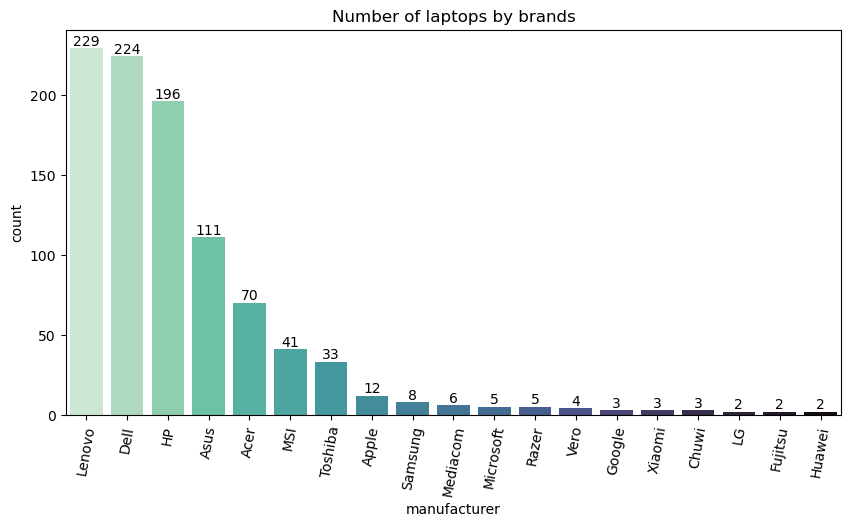

In [101]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette='mako_r', order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

In [102]:
# Most of laptops are from Dell, Lenovo and HP.

In [103]:
# What type of laptop is the most frequent?

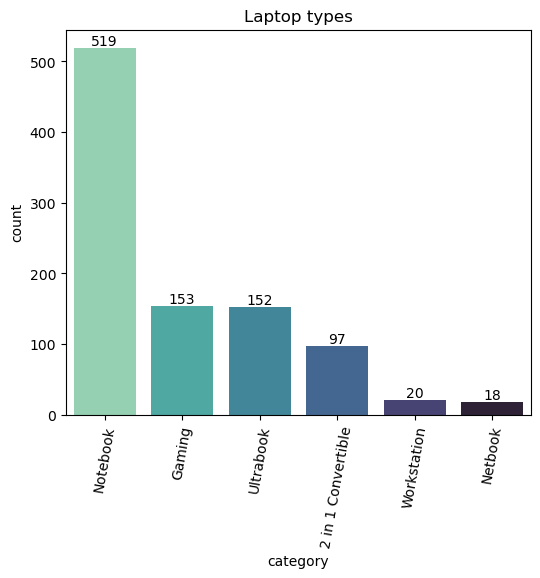

In [104]:
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'category', data = df_train, palette = 'mako_r', order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

In [105]:
# Most laptops are of type notebooks followed by ultrabook and then the gaming ones.

In [106]:
# Which size is the most popular?

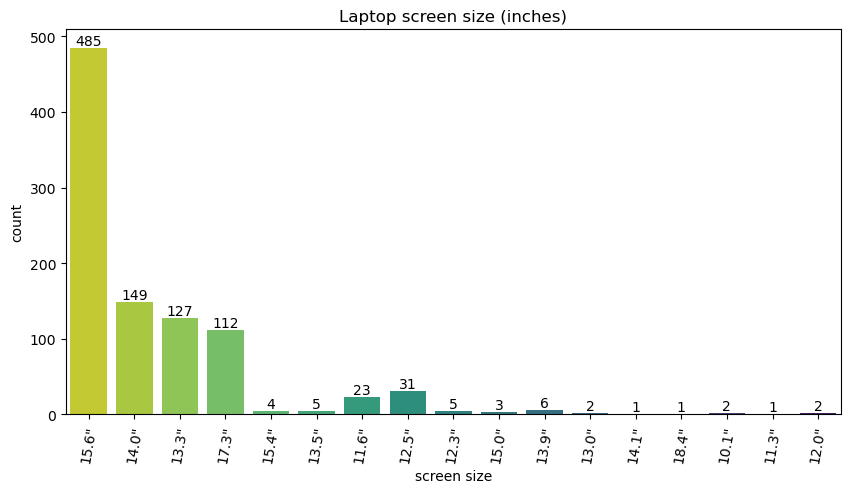

In [107]:
fig, ax  = plt.subplots(figsize = (10,5))
ax=sns.countplot(x = 'screen size', data = df_train, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [108]:
# Majority of the laptops have 15.6 inches.

There are very few laptops with some "non conventional" sizes, which indeed appears in just few rows. For this reason, we will only keep laptops with the more conventional sizes.

In [109]:
inches_list = df_train['screen size'].value_counts().index[:6].tolist()
inches_list

['15.6"', '14.0"', '13.3"', '17.3"', '12.5"', '11.6"']

In [110]:
# We will keep laptops with these 6 sizes!

In [111]:
df_clean = df_clean[df_clean['screen size'].isin(inches_list)]
df_test = df_test[df_test['screen size'].isin(inches_list)]

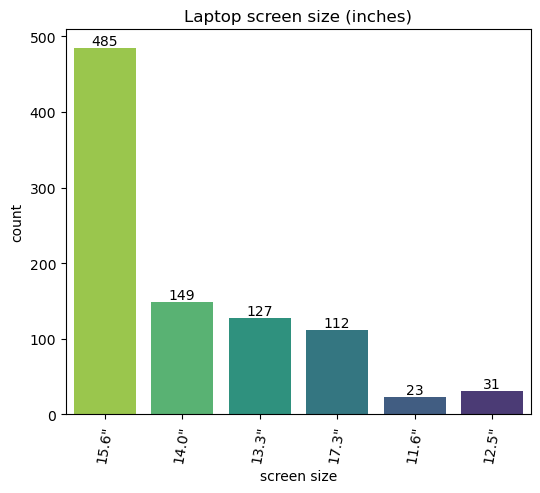

In [112]:
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'screen size', data = df_clean, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [113]:
print('We removed {} outliers!'.format(len(df_train)-len(df_clean)))

We removed 32 outliers!


In [114]:
# How is weight distributed among the laptops?

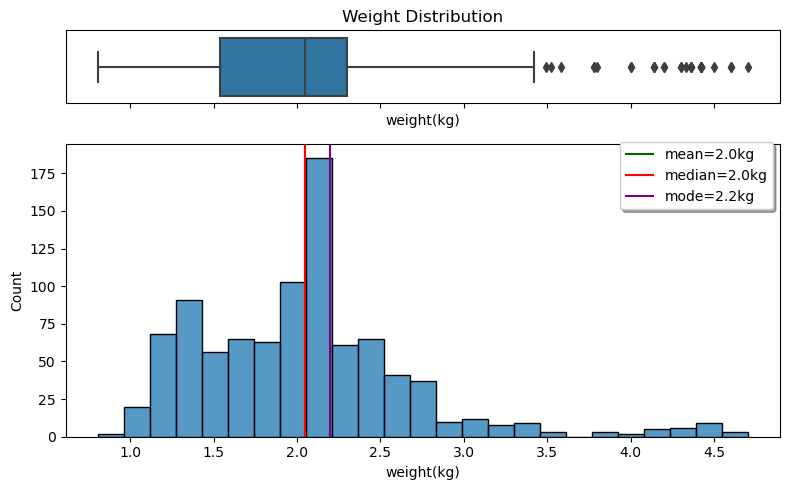

In [115]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution','kg')

In [116]:
# How is price distributed among the laptops?

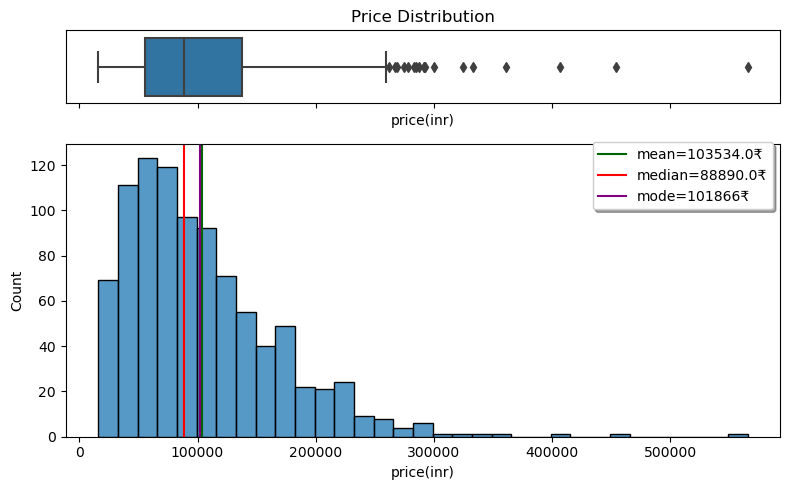

In [122]:
num_plot(df_clean, 'price(inr)', 'Price Distribution','₹')

In [124]:
import plotly.express as px
fig = px.box(df_train, y = 'price(inr)')
fig.show()

In [125]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price(inr)', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

<Axes: xlabel='category', ylabel='price(inr)'>

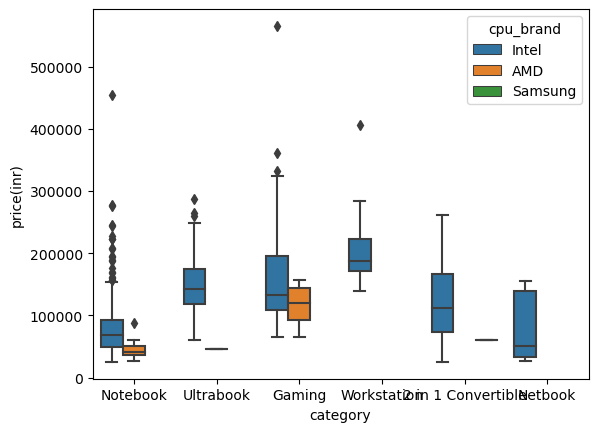

In [132]:
sns.boxplot(x = 'category', y = 'price(inr)', data = df_train[df_train['price(inr)'] > 25000], hue = 'cpu_brand')

In [133]:
df_train[df_train['price(inr)'] > 25000]

manufacturer                            model name   category  \
1295         Dell                         Inspiron 3567   Notebook   
954        Lenovo                         Thinkpad T460  Ultrabook   
1108           HP  15-bw011nv (A6-9220/4GB/1TB/FHD/W10)   Notebook   
463        Lenovo                    IdeaPad 510s-14IKB   Notebook   
717        Lenovo     110-15ACL (A6-7310/4GB/500GB/W10)   Notebook   
...           ...                                   ...        ...   
729            HP    15-BW037na (A9-9420/4GB/1TB/Radeon   Notebook   
1130           HP     15-bs078cl (i7-7500U/8GB/2TB/W10)   Notebook   
597        Lenovo                        Thinkpad T470p   Notebook   
615          Asus     FX753VD-GC007T (i7-7700HQ/8GB/1TB     Gaming   
763          Asus                  Zenbook UX330UA-AH5Q  Ultrabook   

     screen size                    cpu  ram(GB)                      gpu  \
1295       15.6"   Intel Core i7 7500U       8.0       AMD Radeon R5 M430   
954        14.0"   Intel Core i7 6600U       8.0    Intel HD Graphics 520   
1108       15.6"    AMD A6-Series 9220       4.0            AMD Radeon R4   
463        14.0"   Intel Core i7 7500U       8.0       AMD Radeon R7 M460   
717        15.6"    AMD A6-Series 7310       4.0            AMD Radeon R4   
...          ...                    ...      ...                      ...   
729        15.6"    AMD A9-Series 9420       4.0           AMD Radeon 520   
1130       15.6"   Intel Core i7 7500U       8.0    Intel HD Graphics 620   
597        14.0"  Intel Core i5 7300HQ       8.0    Intel HD Graphics 630   
615        17.3"  Intel Core i7 7700HQ       8.0  Nvidia GeForce GTX 1050   
763        13.3"   Intel Core i5 7200U       8.0    Intel HD Graphics 620   

     operating system operating system version  weight(kg)  ...  resolution  \
1295            Linux                      NaN        2.30  ...    1366x768   
954           Windows                       10        1.70  ...   1920x1080   
1108          Windows                       10        2.10  ...   1920x1080   
463             No OS                      NaN        1.50  ...   1920x1080   
717           Windows                       10        2.19  ...    1366x768   
...               ...                      ...         ...  ...         ...   
729           Windows                       10        2.10  ...   1920x1080   
1130          Windows                       10        2.04  ...    1366x768   
597           Windows                       10        1.70  ...   1920x1080   
615           Windows                       10        3.00  ...   1920x1080   
763           Windows                       10        1.20  ...   3200x1800   

     screen_type touchscreen  cpu_freq(GHz)  storage_1_gb  storage_1_type  \
1295         NaN         0.0            2.7        1000.0             HDD   
954     IPSPanel         0.0            2.6         256.0             SSD   
1108         NaN         0.0            2.5        1000.0             HDD   
463     IPSPanel         0.0            2.7         512.0             SSD   
717          NaN         0.0            2.0         500.0             HDD   
...          ...         ...            ...           ...             ...   
729          NaN         0.0            3.0        1000.0             HDD   
1130         NaN         0.0            2.7        2000.0             HDD   
597     IPSPanel         0.0            2.5         256.0             SSD   
615          NaN         0.0            2.8         128.0             SSD   
763     IPSPanel         0.0            2.5         256.0             SSD   

     storage_2_gb  storage_2_type cpu_brand gpu_brand  
1295          0.0             NaN     Intel       AMD  
954           0.0             NaN     Intel     Intel  
1108          0.0             NaN       AMD       AMD  
463           0.0             NaN     Intel       AMD  
717           0.0             NaN       AMD       AMD  
...           ...            

In [134]:
# How is RAM distributed among the laptops?

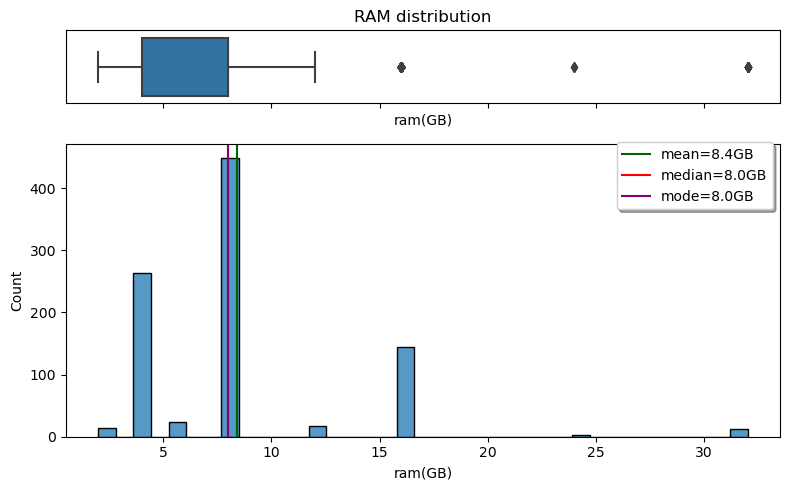

In [135]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [136]:
# Most laptops have 8 GB ram.

In [137]:
# How is CPU frequency distributed among the laptops?

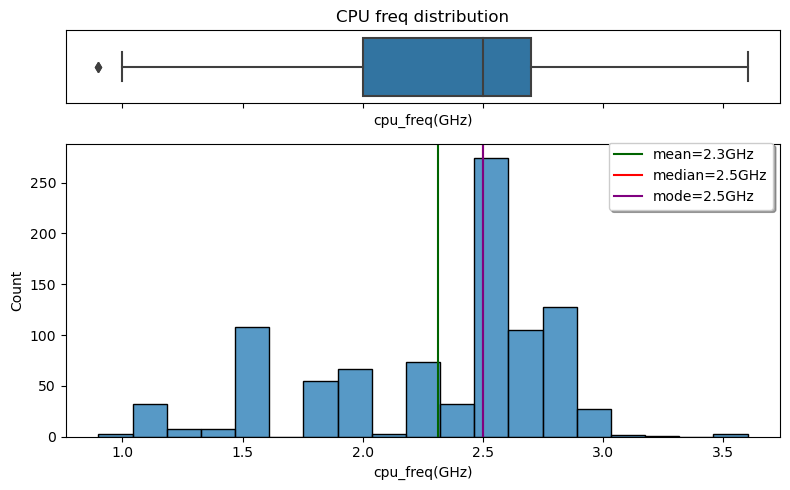

In [138]:
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

In [139]:
# Most laptops have 2.5 GHz CPU

In [140]:
# How is Hard Drive capacity distributed among the laptops?

In [141]:
# First, we will analyze the first hard drive storage capacity

In [142]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price(inr)', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [143]:
df_train.head(2)

manufacturer     model name   category screen size                   cpu  \
1295         Dell  Inspiron 3567   Notebook       15.6"  Intel Core i7 7500U    
954        Lenovo  Thinkpad T460  Ultrabook       14.0"  Intel Core i7 6600U    

      ram(GB)                    gpu operating system  \
1295      8.0     AMD Radeon R5 M430            Linux   
954       8.0  Intel HD Graphics 520          Windows   

     operating system version  weight(kg)  ...  resolution screen_type  \
1295                      NaN         2.3  ...    1366x768         NaN   
954                        10         1.7  ...   1920x1080    IPSPanel   

     touchscreen  cpu_freq(GHz)  storage_1_gb  storage_1_type storage_2_gb  \
1295         0.0            2.7        1000.0             HDD          0.0   
954          0.0            2.6         256.0             SSD          0.0   

      storage_2_type cpu_brand gpu_brand  
1295             NaN     Intel       AMD  
954              NaN     Intel     Intel  

[2 rows x 21 columns]

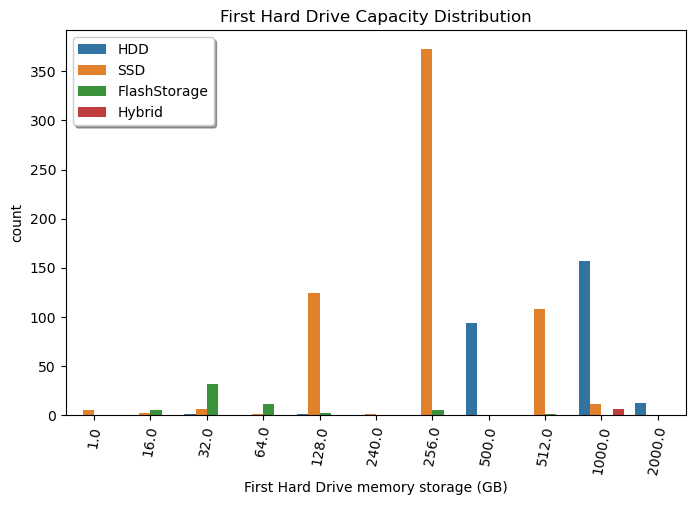

In [144]:
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.countplot(x = 'storage_1_gb', data = df_train, hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most PCs have 256 GB of storage, which is for the most part SSD. Moreover, for storage of 1 TB or higher, most of them are HDD.

In [145]:
# Second hard Drive analysis

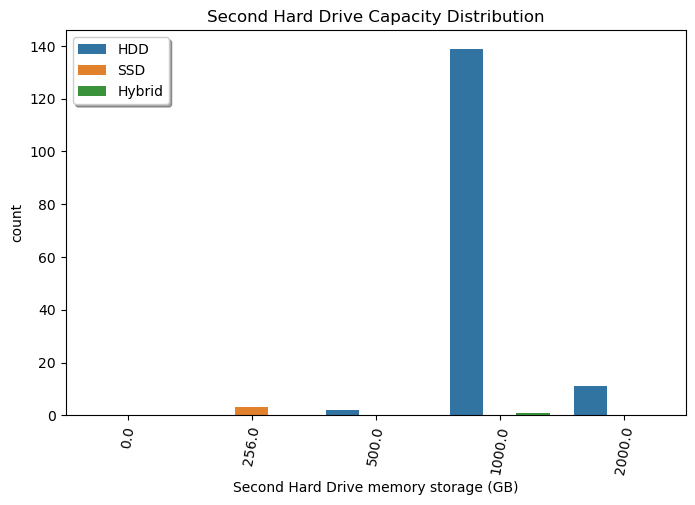

In [146]:
fig, ax  = plt.subplots(figsize = (8,5))
ax=sns.countplot(x = 'storage_2_gb', data = df_train, hue = 'storage_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

In [147]:
# Most of second hard drive storages are 1 TB HDD disks

Until now we analyzed each single feature at a time, in the following we will analyze these features together to find useful insghts about the data.

In [148]:
# Multivariate outliers detection

In [149]:
# Price vs RAM

In [150]:
# We define a custom plot function, which computes, returns and plots a linear regression line.

In [151]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

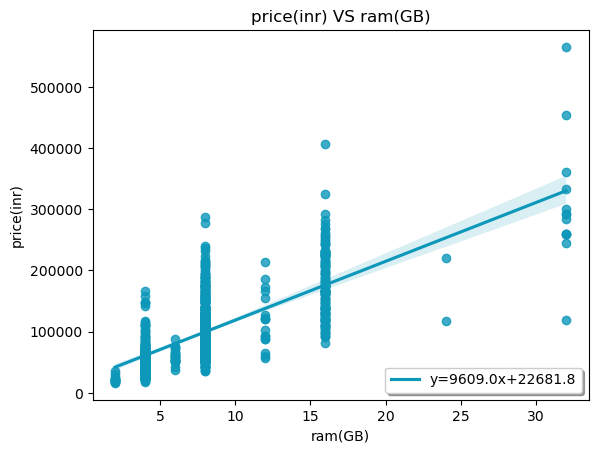

In [153]:
slope, intercept = lr_plot(df_clean,'ram(GB)','price(inr)', 'lower right')

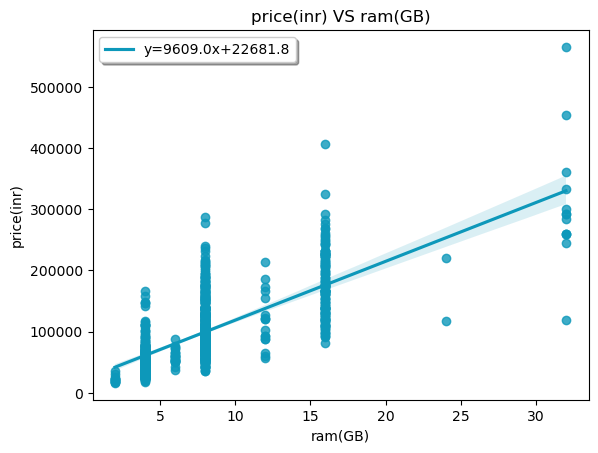

In [155]:
slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price(inr)', 'upper left')

In [156]:
# By removing the outlier value we can see that the slope increases and the intercept decreases.

In [157]:
# Price vs CPU Frequency

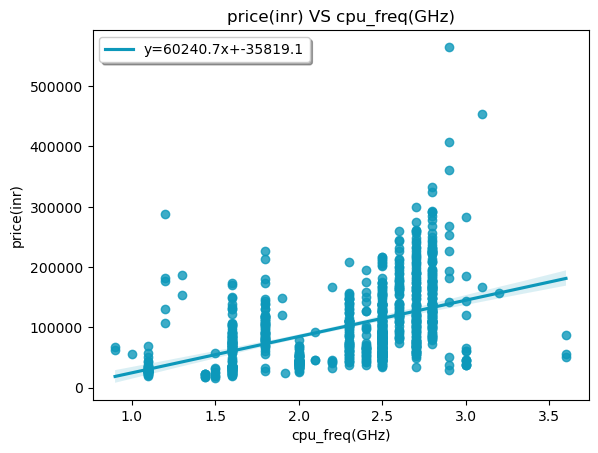

In [158]:
slope, intercept = lr_plot(df_clean, 'cpu_freq(GHz)', 'price(inr)', 'upper left')

In [159]:
# We can see a positive trend between price and the CPU frequency, with no obvious outliers.

In [160]:
# Price vs inches

In [161]:
df_clean.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

for i in range(len(df_clean)):
    df_clean['screen size'][i] = re.sub('"', '', df_clean['screen size'][i])

for i in range(len(df_test)):
    df_test['screen size'][i] = re.sub('"', '', df_test['screen size'][i])

df_clean['screen size'] = df_clean['screen size'].astype(float)
df_test['screen size'] = df_test['screen size'].astype(float)

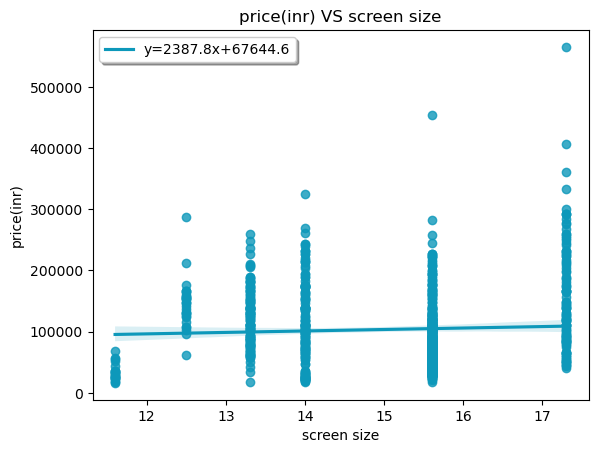

In [162]:
slope, intercept = lr_plot(df_clean, 'screen size', 'price(inr)', 'upper left')

In [163]:
# The regression line is almost flat, meaning that PCs with higher screen inches slightly tends to be more expensive.

In [164]:
# Weight vs Inches

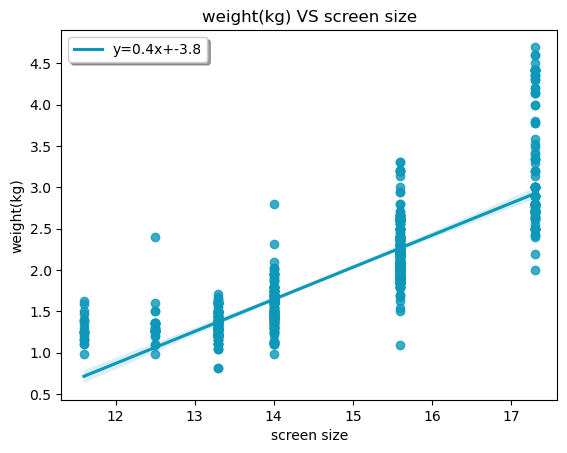

In [165]:
slope, intercept = lr_plot(df_clean, 'screen size', 'weight(kg)', 'upper left')

As expected, PCs with bigger screens are heavier. In particular, on average, for every additional inch the pc is 400g heavier.

In [166]:
# Price VS CPU brand by GPU brand

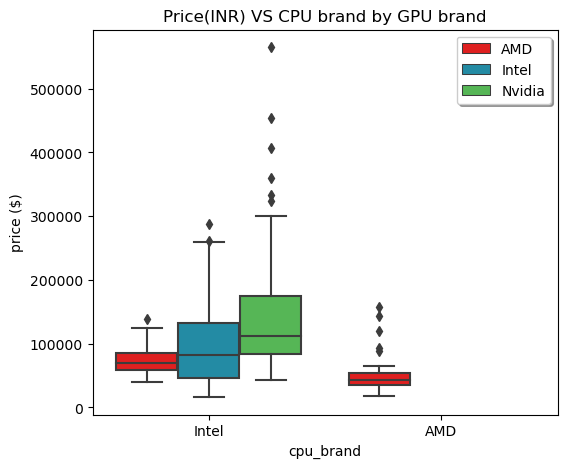

In [168]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize = (6,5))
sns.boxplot(x = 'cpu_brand', y = 'price(inr)', data = df_clean, hue = 'gpu_brand', palette = cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc = 'upper right', ncol=1, fancybox = True, shadow = True, frameon = True)
plt.title('Price(INR) VS CPU brand by GPU brand')
plt.show()

Insights from this plot:
- Laptops with Intel CPUs are more expensive. 
- Laptops with an AMD CPUs also have and AMD GPUs Laptops with Nvidia GPUs are more expensive.

In [169]:
# Which are the TOP 15 most common GPUs?

In [170]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()

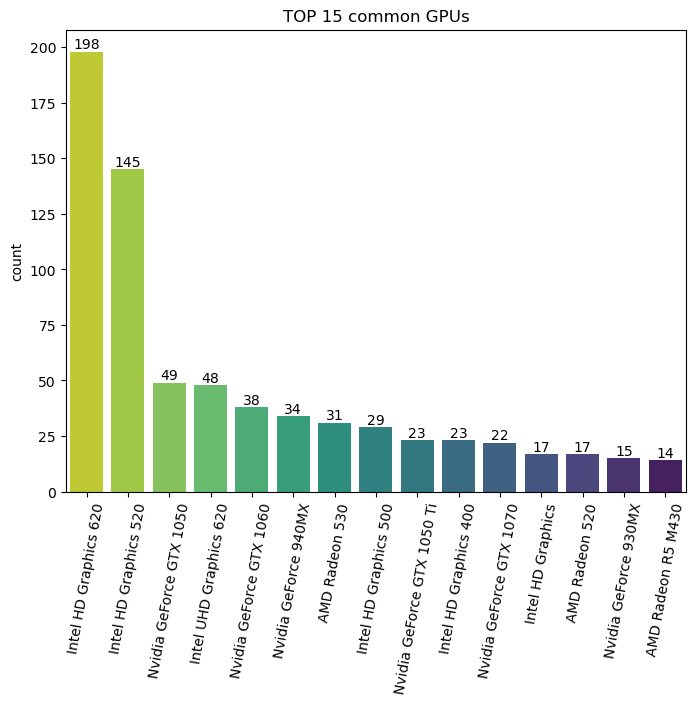

In [171]:
plt.figure(figsize = (8,6))
ax=sns.countplot(x = 'gpu', data = df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette = 'viridis_r')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Nvidia GTX1050.

In [172]:
# Which are the TOP 15 most common CPUs?

In [173]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

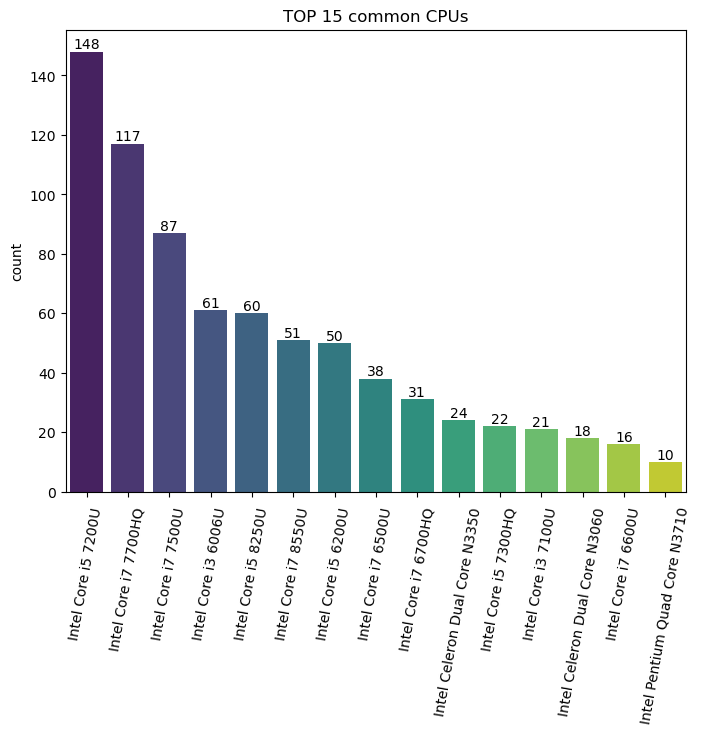

In [174]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'cpu', data = df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette = 'viridis')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

@All the TOP 15 most common CPUs are from Intel. @The most common CPU is the Intel i5 7200U, second is i7 7700HQ and third is i7 7500U. @Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

In [175]:
# What is the average price of laptops by company?

In [176]:
# As seen previously, there are some companies which have just few laptops in the dataset:

In [177]:
df_clean['manufacturer'].value_counts()

manufacturer
Dell        223
Lenovo      220
HP          196
Asus        110
Acer         70
MSI          40
Toshiba      33
Mediacom      6
Apple         6
Samsung       5
Razer         5
Vero          4
Xiaomi        3
LG            2
Fujitsu       2
Chuwi         2
Name: count, dtype: int64

In particular, there are companies with less than 10 laptops in the dataset, which is a very low number from which we can extract statistical results. For this reason, we will consider only laptops with at least 20 laptops in the dataset.

In [181]:
company_list = df_clean['manufacturer'].value_counts().index[:10].tolist()
company_list

['Dell',
 'Lenovo',
 'HP',
 'Asus',
 'Acer',
 'MSI',
 'Toshiba',
 'Mediacom',
 'Apple',
 'Samsung']

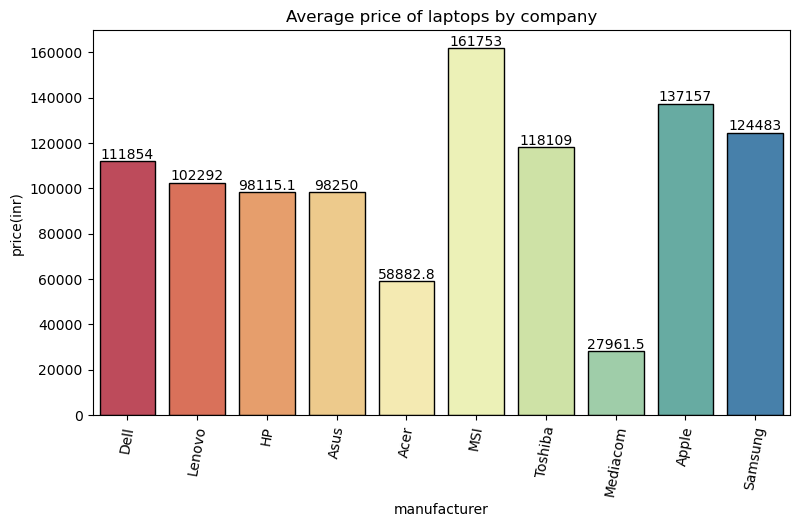

In [182]:
plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'manufacturer', y = 'price(inr)', data = df_clean[df_clean['manufacturer'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

MSI laptops are on average the most expensive. Apple laptops are the second most expensive laptops and Toshiba's are 3rd. Acer are the cheapest, with an average price of 626$ Laptops from Dell, Lenovo, HP and Asus have, on average.

Insights from the correlation matrix:

RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric
CPU Freq has a quite moderate positive correlation with the price (+0.45)
Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

In [183]:
# Data preparation for ML modeling

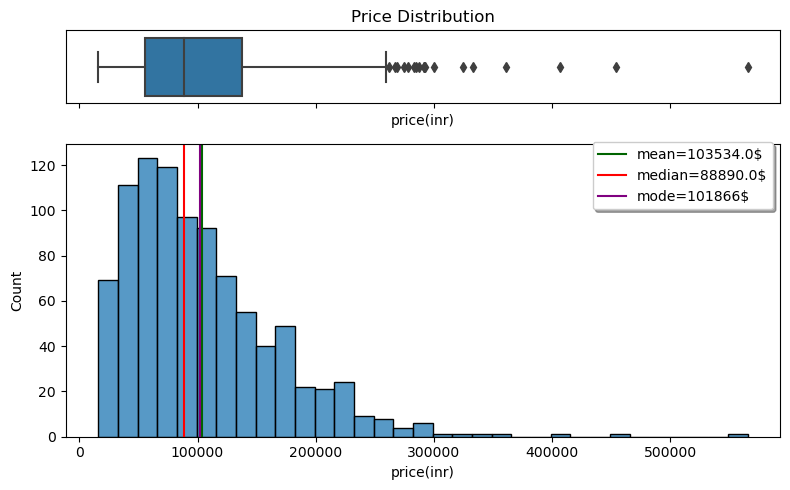

In [184]:
num_plot(df_clean, 'price(inr)', 'Price Distribution','$')

In [185]:
# For prediction, we will use the cleaned dataframe 'df_clean'

In [186]:
df1 = df_clean.copy()

In [187]:
# Moreover, since the target variable 'price' is right skewed, we will log transform it to improve the prediction performance of the algorithms.

In [189]:
df1['price(inr)'] = np.log(df1['price(inr)'])
df_test['price(inr)'] = np.log(df_test['price(inr)'])

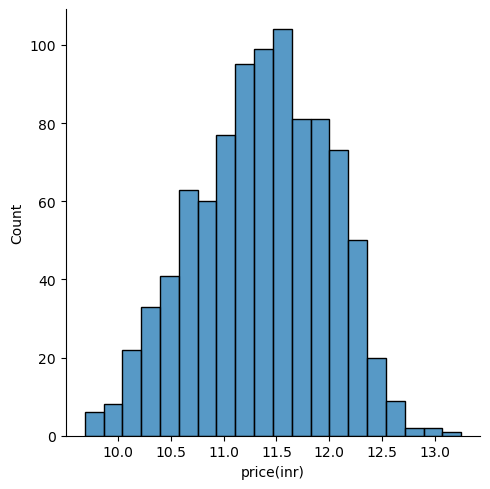

In [190]:
sns.displot(df1['price(inr)'])

In [191]:
# Indeed now the distribution looks more gaussian.

In [192]:
df1 = df1.fillna('NaN')
df_test = df_test.fillna('NaN')

In [193]:
# Categorical features encoding

The categorical columns ('company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand') will be now encoded. An encoding by one hot encoding would be preferrable in this case since there is not a order/hierarchy among the different categories for each variable, but this would lead to a very high number of columns (around 900), which is close to the number of total rows (1000). So, if we had more data a OHE encoding would be preferrable, but in case a Label Encoding will be performed to keep the number of features lower.

In [194]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price(inr)', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [195]:
cat_cols =  ['manufacturer', 'model name', 'category', 'cpu', 'gpu', 'operating system',
             'resolution', 'screen_type', 'storage_1_type', 'storage_2_type',
             'gpu_brand', 'cpu_brand']

In [196]:
# One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension :  (927, 696)


In [197]:
# Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])

for cols in cat_cols:
    df_train[cols] = en.fit_transform(df_train[cols])

print('Dataframe encoded by Label encoding dimension : ', df1.shape)

Dataframe encoded by Label encoding dimension :  (927, 21)


In [198]:
df1.head()

manufacturer  model name  category  screen size  cpu  ram(GB)  gpu  \
0             4         190         3         15.6   57      8.0   14   
1             8         384         4         14.0   53      8.0   33   
2             6          27         3         15.6    4      4.0    6   
3             8         173         3         14.0   57      8.0   18   
4             8           0         3         15.6    3      4.0    6   

   operating system operating system version  weight(kg)  ...  resolution  \
0                 1                      NaN        2.30  ...           0   
1                 4                       10        1.70  ...           3   
2                 4                       10        2.10  ...           3   
3                 3                      NaN        1.50  ...           3   
4                 4                       10        2.19  ...           0   

   screen_type  touchscreen  cpu_freq(GHz)  storage_1_gb  storage_1_type  \
0            2          0.0            2.7        1000.0               1   
1            0          0.0            2.6         256.0               3   
2            2          0.0            2.5        1000.0               1   
3            0          0.0            2.7         512.0               3   
4            2          0.0            2.0         500.0               1   

   storage_2_gb  storage_2_type  cpu_brand  gpu_brand  
0           0.0               2          1          0  
1           0.0               2          1          1  
2           0.0               2          0          0  
3           0.0               2          1          0  
4           0.0               2          0          0  

[5 rows x 21 columns]

In [210]:
# One hot encoding
df_final = pd.get_dummies(df1, columns = cat_cols, drop_first = True, dtype=int)
df_final

screen size  ram(GB) operating system version  weight(kg)  price(inr)  \
0           15.6      8.0                      NaN        2.30   11.221329   
1           14.0      8.0                       10        1.70   11.835110   
2           15.6      4.0                       10        2.10   10.515723   
3           14.0      8.0                      NaN        1.50   11.212617   
4           15.6      4.0                       10        2.19   10.226368   
..           ...      ...                      ...         ...         ...   
922         15.6      4.0                       10        2.10   10.721614   
923         15.6      8.0                       10        2.04   10.973392   
924         14.0      8.0                       10        1.70   11.824995   
925         17.3      8.0                       10        3.00   11.592309   
926         13.3      8.0                       10        1.20   11.558348   

     touchscreen  cpu_freq(GHz)  storage_1_gb  storage_2_gb  manufacturer_1  \
0            0.0            2.7        1000.0           0.0               0   
1            0.0            2.6         256.0           0.0               0   
2            0.0            2.5        1000.0           0.0               0   
3            0.0            2.7         512.0           0.0               0   
4            0.0            2.0         500.0           0.0               0   
..           ...            ...           ...           ...             ...   
922          0.0            3.0        1000.0           0.0               0   
923          0.0            2.7        2000.0           0.0               0   
924          0.0            2.5         256.0           0.0               0   
925          0.0            2.8         128.0        1000.0               0   
926          0.0            2.5         256.0           0.0               0   

     ...  screen_type_2  storage_1_type_1  storage_1_type_2  storage_1_type_3  \
0    ...              1                 1                 0                 0   
1    ...              0                 0                 0                 1   
2    ...              1                 1                 0                 0   
3    ...              0                 0                 0                 1   
4    ...              1                 1                 0                 0   
..   ...            ...               ...               ...               ...   
922  ...              1                 1                 0                 0   
923  ...              1                 1                 0                 0   
924  ...              0                 0                 0                 1   
925  ...              1                 0                 0                 1   
926  ...              0                 0                 0                 1   

     storage_2_type_1  storage_2_type_2  storage_2_type_3  gpu_brand_1  \
0                   0                 1                 0            0   
1                   0                 1                 0            1   
2                   0                 1                 0            0   
3                   0                 1                 0            0   
4                   0                 1                 0            0   
..                ...               ...               ...          ...   
922                 0                 1                 0            0   
923                 0                 1                 0            1   
924                 0                 1                 0            1   
925                 0                 0                 0            0   
926                 0                 1                 0            1   

     gpu_brand_2  cpu_brand_1  
0              0            1  
1              0            1  
2              0            0  
3              0            1  
4              0            0  
..           ...          ...  
922            0            0  
9

In [212]:
len(df_final[df_final['operating system version']== 'NaN'])

120

In [215]:
df_final['operating system version'].value_counts()

operating system version
10      773
NaN     120
7        31
10 S      2
X         1
Name: count, dtype: int64

# Data Preparation:

In [199]:
x_train = df1.drop('price(inr)', axis = 1).values
y_train = df1['price(inr)'].values

x_test = df_test.drop('price(inr)', axis = 1).values
y_test = df_test['price(inr)'].values

In [200]:
# Train - Validation split

In [201]:
# Moreover, we define an additional validation set, which will be used to monitor overfitting.

In [202]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = seed)

In [203]:
x_train

array([[2, 321, 1, ..., 0, 1, 2],
       [4, 230, 4, ..., 2, 1, 1],
       [2, 325, 1, ..., 0, 1, 2],
       ...,
       [8, 405, 3, ..., 2, 1, 1],
       [6, 93, 4, ..., 2, 1, 1],
       [4, 455, 4, ..., 2, 1, 1]], dtype=object)

In [204]:
y_train

array([12.02424497, 11.96174376, 11.70894445, 12.17847532, 11.40964057,
       12.12966125, 10.66026659, 11.5314135 , 12.35290518, 11.62349141,
       10.46681075, 11.82091739, 10.56627861, 11.39515493, 11.75109949,
       10.58837572, 12.33106077, 11.34270638, 11.89696944, 11.84181186,
       12.15436874, 11.84181186, 11.00159972, 11.77847695, 11.43601202,
       10.44006864, 11.61850096, 11.60168698, 10.15688869, 12.46663529,
       11.3080515 , 11.72893966, 11.67524838, 10.49282856, 11.05868494,
       11.15464924, 11.08766573, 10.93117654, 12.30495824, 11.61516612,
       11.23734323, 11.24948062, 11.01998887, 10.38433839, 11.13185536,
       11.90138004, 11.38467155, 11.39515493, 11.98455902, 12.29100645,
       12.02424497, 12.26948866, 12.189374  , 11.73638097, 11.77277118,
       11.36646514, 12.23856888, 11.44597337, 12.14378226, 11.52227165,
       10.90087889, 10.63852016, 11.93779443, 11.20002131, 11.83579127,
       10.48251373, 12.10939653, 10.9085764 , 11.59316815, 10.89

In [205]:
print(x_train.shape, y_train.shape)

(648, 20) (648,)


In [206]:
print(x_test.shape, y_test.shape)

(317, 20) (317,)
